In [1]:
# magic
%load_ext autoreload
%autoreload 2
%matplotlib inline

# import necessary libraries

# system
import os

# data science 
import numpy as np 
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D 

# ml related
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## DLCV 2019: Homework01 Question 1

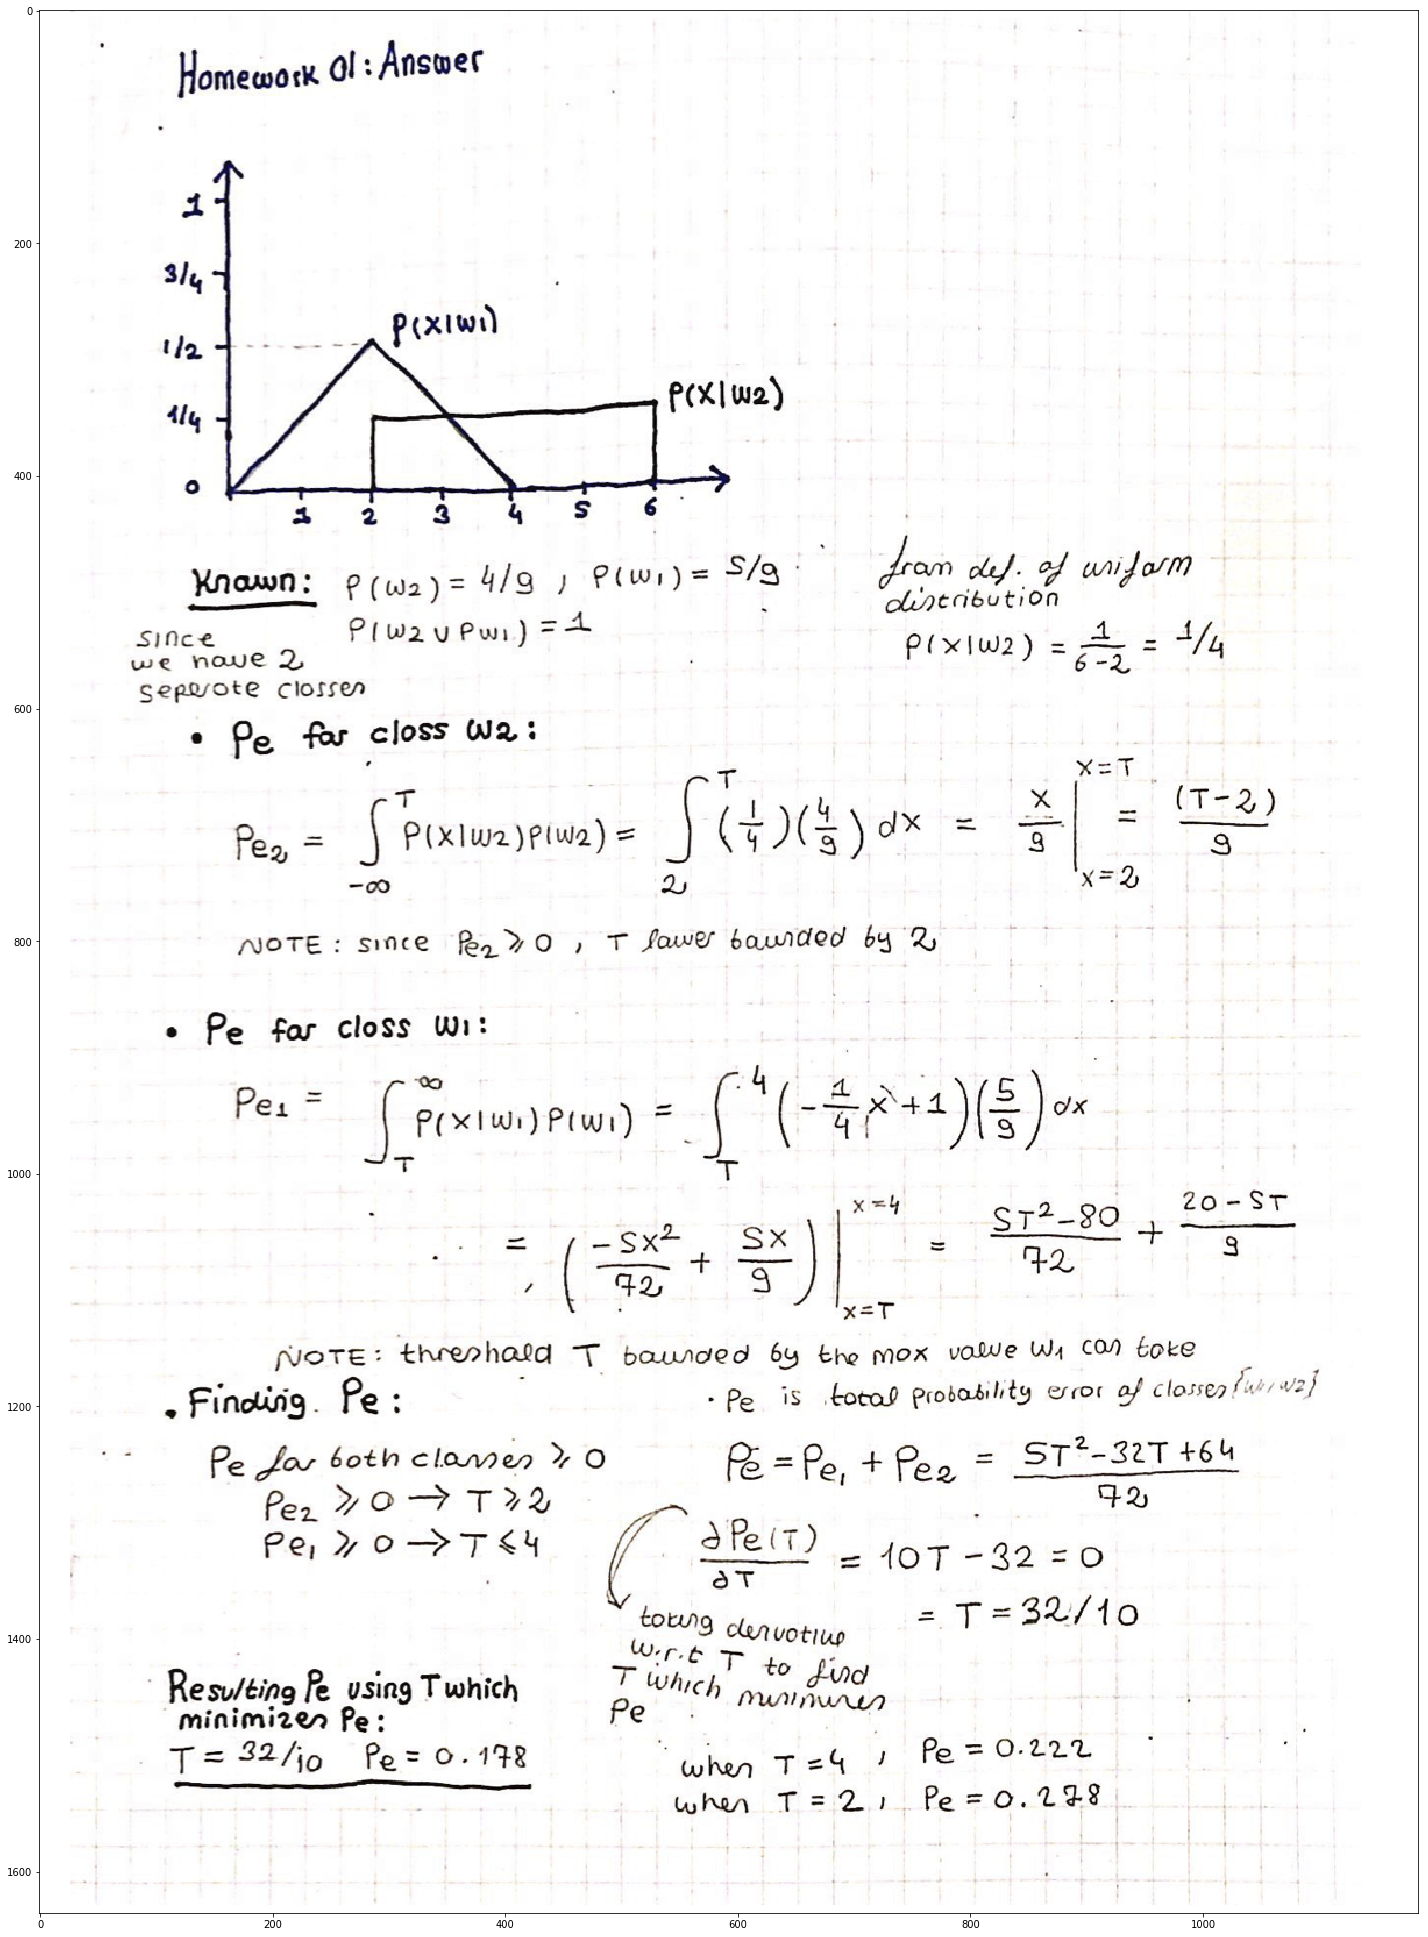

In [3]:
img=mpimg.imread("DLCV_hw1_q1.png")
plt.figure(figsize=(50, 35))
imgplot = plt.imshow(img)
plt.show()

## DLCV 2019: Homework01 Quesiton 2

### Load the dataset & Perform Train/Test Split

- There are 40 different subjects. 
- Each subject have 10 images with size (56, 46). 
- For each subject, first 6 images will belong to training set and the other 4 images will belong to the test set.

In [4]:
path = "p2_data/"
NUM_CLASSES = 40
offset = 6

# for training set
x_train = []
y_train = []

# for test set
x_test = []
y_test = [] 

In [5]:
for filename in os.listdir(path):
    filename_underscore = filename.find("_")
    filename_dot = filename.find(".")
    image_label = filename[:filename_underscore]
    image_number = filename[filename_underscore+1:filename_dot]
    print("image with class: %s, #no: %s"%(image_label, image_number))
    
    file_path = os.path.join(path, filename)
    img = plt.imread(file_path, "RGB") 
    img = img.reshape(-1) 
    if int(image_number) <= 6:
        x_train.append(img)
        y_train.append(image_label)
    else:
        x_test.append(img)
        y_test.append(image_label)    

image with class: 29, #no: 2
image with class: 34, #no: 7
image with class: 12, #no: 4
image with class: 36, #no: 5
image with class: 10, #no: 6
image with class: 23, #no: 9
image with class: 30, #no: 3
image with class: 14, #no: 2
image with class: 32, #no: 1
image with class: 14, #no: 3
image with class: 8, #no: 1
image with class: 30, #no: 2
image with class: 16, #no: 1
image with class: 23, #no: 8
image with class: 7, #no: 10
image with class: 10, #no: 7
image with class: 36, #no: 4
image with class: 12, #no: 5
image with class: 34, #no: 6
image with class: 29, #no: 3
image with class: 29, #no: 1
image with class: 12, #no: 7
image with class: 34, #no: 4
image with class: 2, #no: 8
image with class: 38, #no: 9
image with class: 10, #no: 5
image with class: 36, #no: 6
image with class: 40, #no: 9
image with class: 16, #no: 3
image with class: 8, #no: 3
image with class: 32, #no: 2
image with class: 12, #no: 10
image with class: 14, #no: 1
image with class: 21, #no: 8
image with class

image with class: 14, #no: 9
image with class: 6, #no: 4
image with class: 30, #no: 8
image with class: 40, #no: 1
image with class: 23, #no: 2
image with class: 4, #no: 6
image with class: 18, #no: 4
image with class: 23, #no: 10
image with class: 25, #no: 4
image with class: 38, #no: 1
image with class: 27, #no: 6
image with class: 31, #no: 10
image with class: 29, #no: 9
image with class: 17, #no: 10
image with class: 34, #no: 8
image with class: 27, #no: 2
image with class: 2, #no: 4
image with class: 38, #no: 5
image with class: 10, #no: 9
image with class: 4, #no: 2
image with class: 23, #no: 6
image with class: 40, #no: 5
image with class: 21, #no: 4
image with class: 21, #no: 5
image with class: 33, #no: 10
image with class: 6, #no: 1
image with class: 40, #no: 4
image with class: 23, #no: 7
image with class: 18, #no: 1
image with class: 4, #no: 3
image with class: 25, #no: 1
image with class: 10, #no: 8
image with class: 38, #no: 4
image with class: 21, #no: 10
image with clas

In [6]:
# convert training and test sets to the numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [7]:
print("Size of the training set:",len(x_train))
print("Size of the test set:",len(x_test))
image_shape = plt.imread(os.path.join(path, "1_1.png")).shape
print("Shape of the images before flattening:",image_shape)
print("Shape of the dataset prepared for PCA:", x_train.shape)

Size of the training set: 240
Size of the test set: 160
Shape of the images before flattening: (56, 46)
Shape of the dataset prepared for PCA: (240, 2576)


### Plotting Mean Face and First 4 Eigenfaces

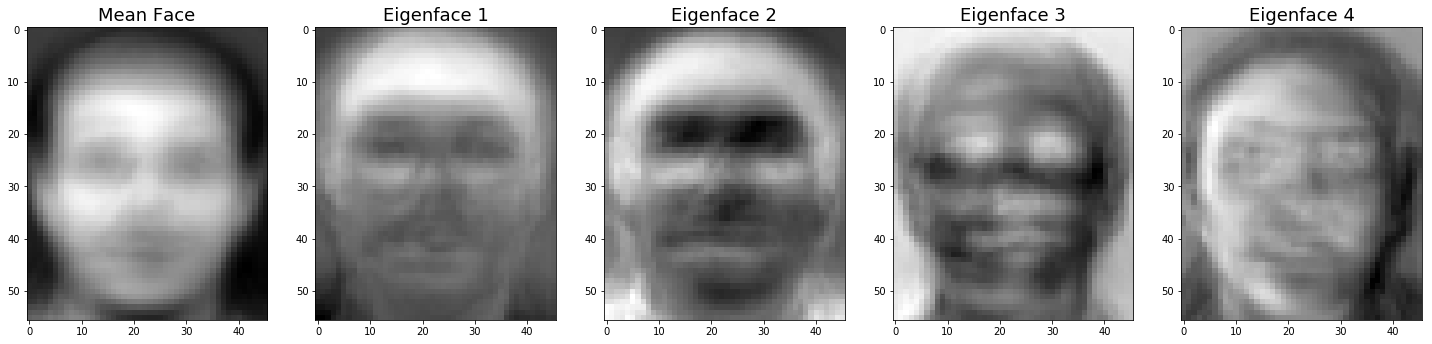

In [8]:
# Calculate mean of the features
mean_face = np.mean(x_train, axis=0)
mean_face = np.reshape(mean_face, image_shape)

N = x_train.shape[0]
pca = PCA(n_components = N-1)
pca_fit = pca.fit(np.subtract(x_train,mean_face.reshape(-1)))

# obtain eigenfaces
eigenface1 = pca_fit.components_[0].reshape(image_shape) 
eigenface2 = pca_fit.components_[1].reshape(image_shape)
eigenface3 = pca_fit.components_[2].reshape(image_shape)
eigenface4 = pca_fit.components_[3].reshape(image_shape)

# set the subplot
plt.figure(figsize=(25,16))
plt.subplot(151)
plt.imshow(mean_face, cmap='gray')
plt.title("Mean Face", fontsize = 18)
plt.subplot(152)
plt.imshow(eigenface1, cmap='gray')
plt.title("Eigenface 1", fontsize = 18)
plt.subplot(153)
plt.imshow(eigenface2, cmap='gray')
plt.title("Eigenface 2", fontsize = 18)
plt.subplot(154)
plt.imshow(eigenface3, cmap='gray')
plt.title("Eigenface 3", fontsize = 18)
plt.subplot(155)
plt.imshow(eigenface4, cmap='gray')
plt.title("Eigenface 4", fontsize = 18)

plt.show()

### Image Reconstruction Using Eigenfaces

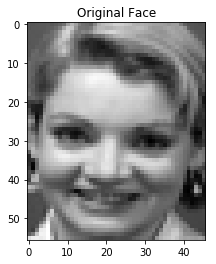

In [9]:
original_face = plt.imread(os.path.join(path, str(1)+"_" + str(1) + ".png"), "RGB")
plt.figure(figsize=(6,4))
plt.title("Original Face")
_ = plt.imshow(original_face, cmap="gray")

In [10]:
# flatten the image
original_face_flat = original_face.reshape(1, -1)

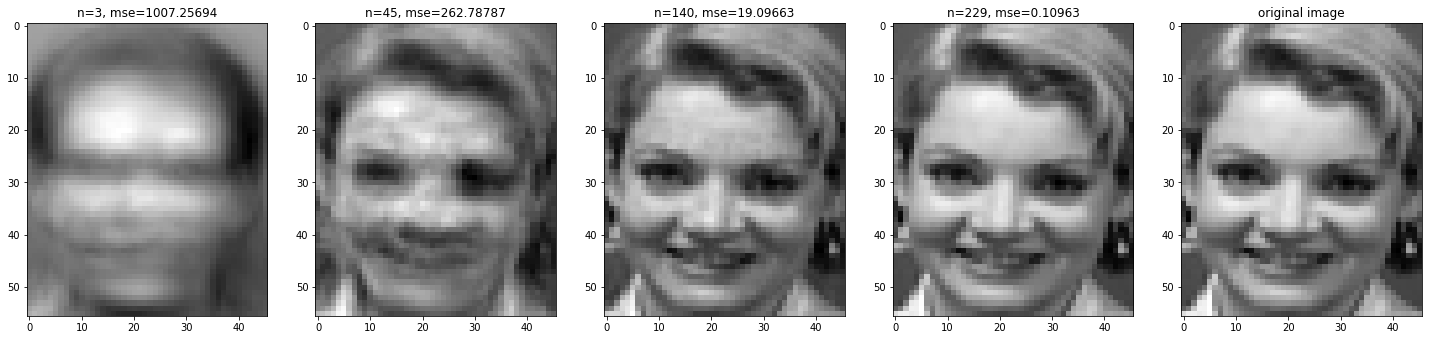

In [11]:
# set the plot
plt.figure(figsize=(25,16))
idx = 151
# Normalize the image by substracting the mean face from original face and project the data onto the PCA space.
pca_orig_image = pca_fit.transform(np.subtract(original_face_flat, mean_face.reshape(-1)))

# Use PCA space dimensions 3, 45, 140 and 229 to reconstruct images
for i in (3, 45, 140, 229):
    img_pca = np.dot(pca_orig_image[0,:i], pca_fit.components_[:i]) + mean_face.reshape(-1)
    # Calculating mean squared error between original image and the image which is reconstructed
    mse = mean_squared_error(img_pca.reshape((1, img_pca.shape[0])), original_face_flat) 
    img_pca = img_pca.reshape(original_face.shape)
    plt.subplot(idx)
    plt.title("n=%s, mse=%.5f" % (i, mse))
    plt.imshow(img_pca, cmap='gray')
    idx += 1

plt.subplot(idx)
plt.title("%s" %("original image"))
_ = plt.imshow(original_face, cmap='gray')

### Hyperparameter Tuning for kNN
- Find best k and n values
- Perform 3-fold cross-validation
- k = {1, 3, 5} and n = {3, 45, 140}
- Show cross-validation results & explain reason behind your choice of (k, n)

In [15]:
x_train_normalized = pca_fit.transform(np.subtract(x_train, mean_face.reshape(-1))) 
y_train = np.array(y_train)

# Configure kNN
params = {'n_neighbors':[1,3,5]}
kNN = KNeighborsClassifier()
cv = GridSearchCV(kNN, params, cv = 3)

df = dict() 
for i in (3, 45, 140):
    cv.fit(x_train_normalized[:, :i], y_train)
    df['n = '+str(i)] = np.array(cv.cv_results_['mean_test_score']) 

df = pd.DataFrame.from_dict(df, orient = 'index')
df.index = ["n=3", "n=45", "n=140"]
df.columns = ['k=1','k=3','k=5']

In [16]:
df

,k=1,k=3,k=5
n=3,0.691667,0.595833,0.525000
n=45,0.941667,0.841667,0.750000
n=140,0.954167,0.829167,0.745833


### Determine the Performance On The Test Set Using The Hyperparameters

- I choose n = 140 and k = 1 as the best hyperparameter according to the performance

NOTE: According to hyperparameter optimization k = 1 and n = 140 performed better but in real life n = 45 is better

In [17]:
# best parameters
k = 1
n = 45

In [18]:
# Project images onto the principal components
pca_test = pca_fit.transform(np.subtract(x_test, mean_face.reshape(-1)))

In [19]:
x_train_normalized = pca_fit.transform(np.subtract(x_train, mean_face.reshape(-1))) 
y_train = np.array(y_train)

In [20]:
kNN_opt = KNeighborsClassifier(n_neighbors = k)
kNN_opt.fit(x_train_normalized[:,:n], y_train)
pred = kNN_opt.predict(pca_test[:,:n])
print("Accuracy on the test set:", accuracy_score(y_pred = pred, y_true = y_test))

Accuracy on the test set: 0.95625


## Problem 3: Visual Bag of Words

In [35]:
# construct the X_train and X_test which are the training and test sets
path = "p3_data/"

classes = ('banana/', 'fountain/', 'reef/', 'tractor/')

X_train = []
X_test = []

# didn't write so but anyways...
Y_train = []
Y_test = []

original_image_shape = plt.imread(os.path.join(path, "banana/banana_011.JPEG"), "RGB").shape

In [36]:
def string_to_num(string):
    """Converts 3 digit string into integer
    """
    num = 0
    for i in range(0, 3):
        num += (int(string[2-i]) * 10 ** i)
    return num

In [37]:
def to_rgb3(img):
    """Converts the greyscale image to RGB by stacking channels
    """
    return np.asarray(np.dstack((img, img, img)))

In [38]:
for class_img in classes: 
    new_path = path + class_img
    for filename in os.listdir(new_path):
        num_start = filename.find("_")
        num_start += 1
        num_end = filename[num_start+1:].find(".")
        num_end += num_start
      
        img_num = string_to_num(filename[num_start:num_end+1])
        file_path = os.path.join(new_path, filename)
        img = plt.imread(file_path, "RGB") 
        img = img.reshape(-1) 
        
        
        # convert greyscale to RGB (NOTE: Ask this part to TA's) 
        try:
            img.reshape(original_image_shape)
        except:
            img = img.reshape((64, 64, 1))
            img = to_rgb3(img)
        img = img.reshape(-1)
       
        if img_num <= 375:
            X_train.append(img)
            Y_train.append(class_img)
        else:
            X_test.append(img)
            Y_test.append(class_img) 

In [39]:
# Conversion to the numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [40]:
print("Number of training set images: ", X_train.shape[0])
print("Number of test set images: ", X_test.shape[0])
print("Shape of the original image: ", original_image_shape)
print("There are also some black-white images with shape (64, 64)")

Number of training set images:  1500
Number of test set images:  500
Shape of the original image:  (64, 64, 3)
There are also some black-white images with shape (64, 64)


In [41]:
# patch image into 16x16 pieces...
def divide_img_to_patches(img, patch_size):
    """Divides image into patches
    Args:
        img: type(numpy.array), array representation of the image
        patch_size: type(int), only supports square patches
    
    NOTE: pos(left, top, right, bottom)
    No need to padding as well since data well defined
    """
    w, h, c = img.shape

    img_patches = []
    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            img_patches.append(img[i:i+patch_size, j:j+patch_size])
    return img_patches

In [42]:
# divide each image in the training and test set into patches
X_train_patch = []
X_test_patch = []

grey_shape = (64, 64, 1)
for img in X_train:
    
    """DELETE
    try:
        X_train_patch.append(divide_img_to_patches(img.reshape(original_image_shape), 16))
    except: 
        X_train_patch.append(divide_img_to_patches(img.reshape(grey_shape), 16))
    """
    X_train_patch.append(divide_img_to_patches(img.reshape(original_image_shape), 16))
    
    

for img in X_test:
    """DELETE
    try:
        X_test_patch.append(divide_img_to_patches(img.reshape(original_image_shape), 16))
    except:
        X_test_patch.append(divide_img_to_patches(img.reshape(grey_shape), 16))   
    """
    X_test_patch.append(divide_img_to_patches(img.reshape(original_image_shape), 16))

In [43]:
class_idx = 0
chosen_idx = set()
num_chosen = 0
categories_patches = {'banana': [], 'fountain': [], 'reef': [], 'tractor': []}

def get_unique_patches(img):
    chosen = []
    chosen_idx = set()
    while len(chosen) < 3:
        idx = np.random.randint(0, 16)
        if idx not in chosen_idx:
            chosen.append(img[idx])
            chosen_idx.add(idx)
    return chosen

# choose 4 random images from the first class
while num_chosen < 4 and class_idx < 1500:
    idx = np.random.randint(class_idx, class_idx+375)
    if idx not in chosen_idx:
        chosen_idx.add(idx)
        num_chosen += 1
        # choose 3 patches
        patch = get_unique_patches(X_train_patch[idx])
        categories_patches[Y_train[idx][:-1]] += patch
    if num_chosen == 4:
        num_chosen = 0
        class_idx += 375

Image belongs:  banana


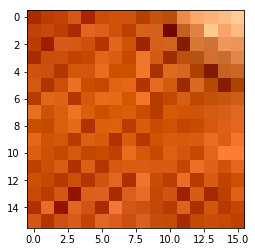

Image belongs:  banana


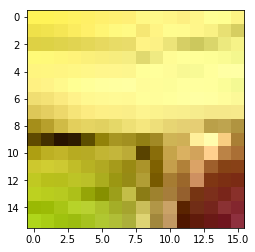

Image belongs:  banana


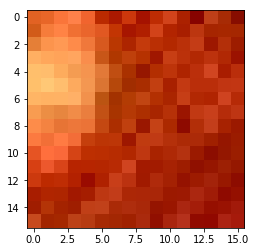

Image belongs:  banana


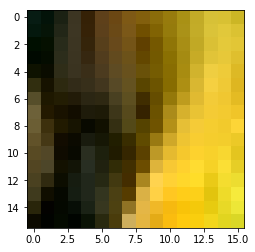

Image belongs:  banana


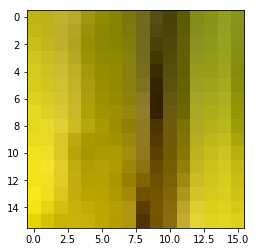

Image belongs:  banana


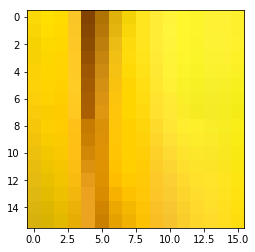

Image belongs:  banana


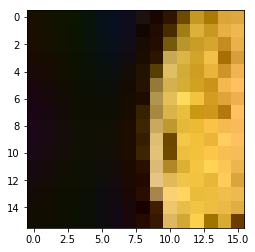

Image belongs:  banana


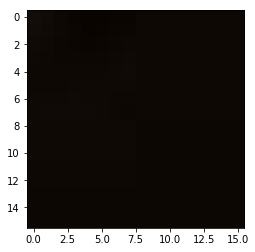

Image belongs:  banana


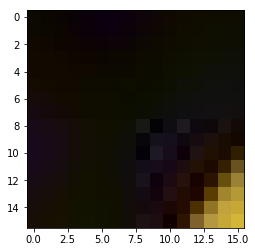

Image belongs:  banana


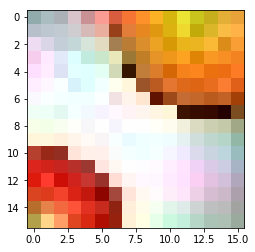

Image belongs:  banana


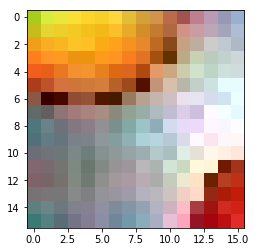

Image belongs:  banana


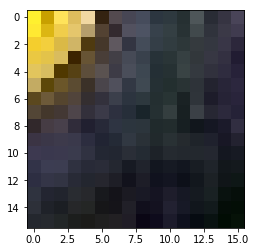

Image belongs:  fountain


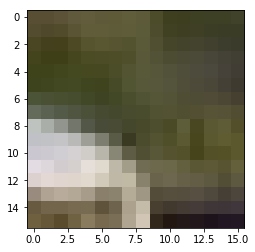

Image belongs:  fountain


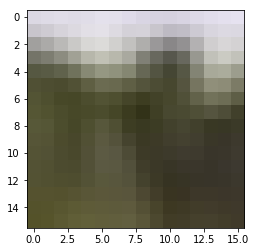

Image belongs:  fountain


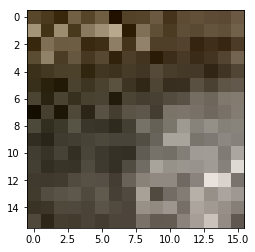

Image belongs:  fountain


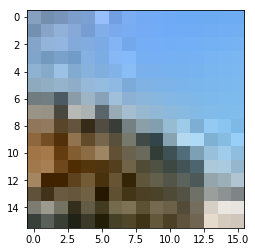

Image belongs:  fountain


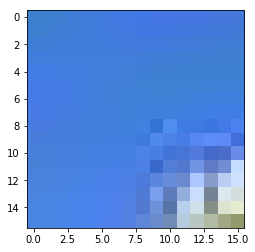

Image belongs:  fountain


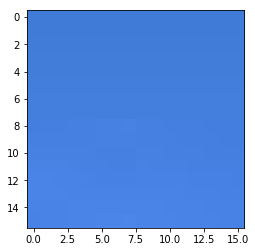

Image belongs:  fountain


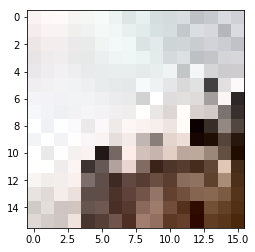

Image belongs:  fountain


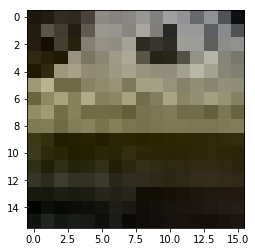

Image belongs:  fountain


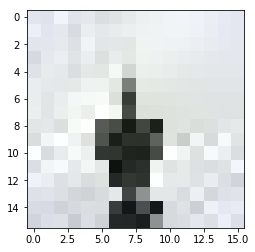

Image belongs:  fountain


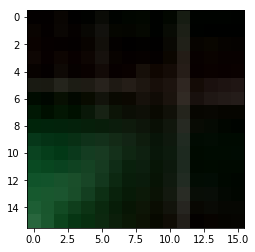

Image belongs:  fountain


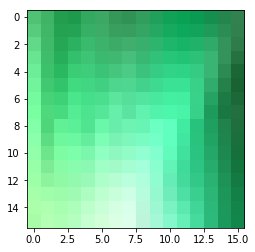

Image belongs:  fountain


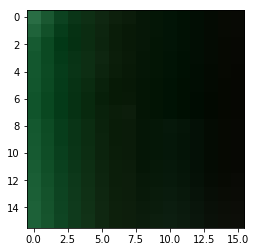

Image belongs:  reef


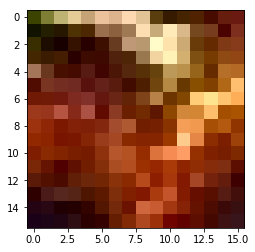

Image belongs:  reef


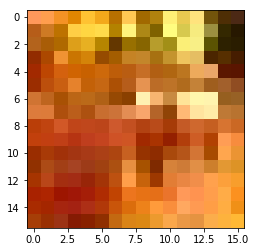

Image belongs:  reef


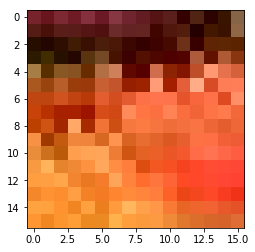

Image belongs:  reef


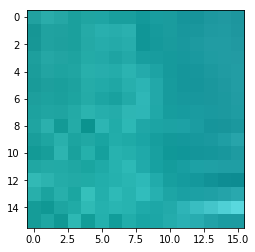

Image belongs:  reef


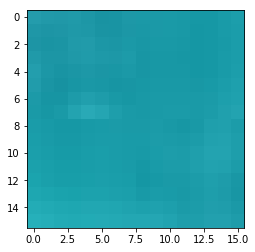

Image belongs:  reef


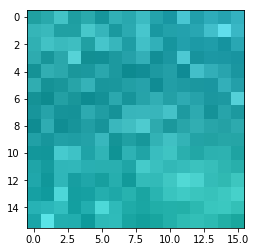

Image belongs:  reef


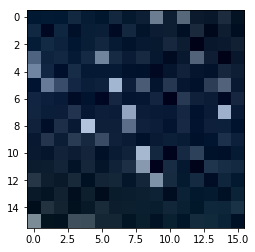

Image belongs:  reef


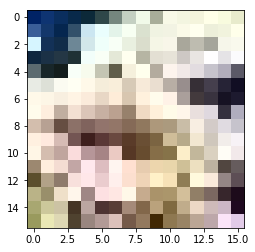

Image belongs:  reef


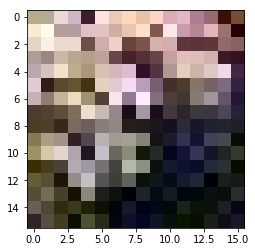

Image belongs:  reef


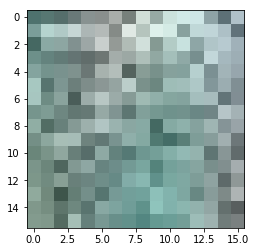

Image belongs:  reef


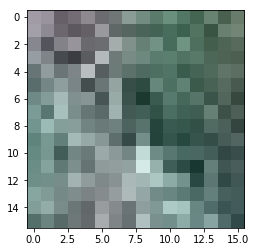

Image belongs:  reef


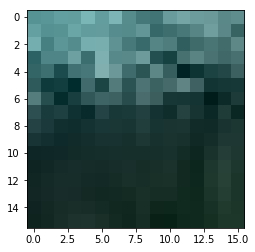

Image belongs:  tractor


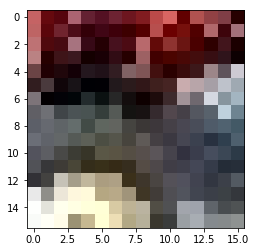

Image belongs:  tractor


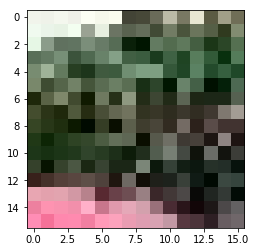

Image belongs:  tractor


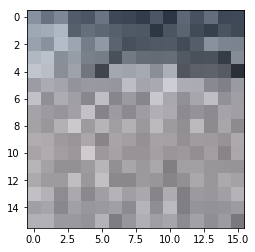

Image belongs:  tractor


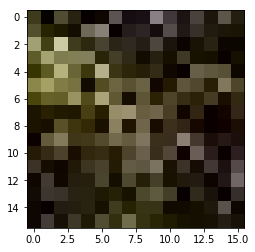

Image belongs:  tractor


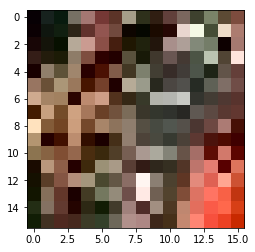

Image belongs:  tractor


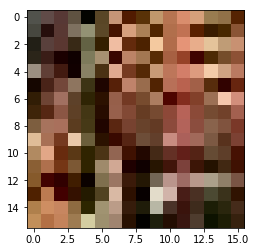

Image belongs:  tractor


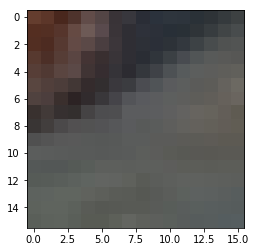

Image belongs:  tractor


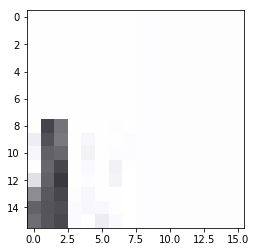

Image belongs:  tractor


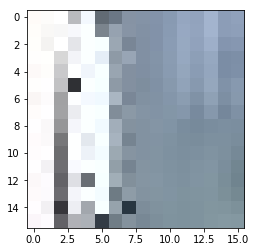

Image belongs:  tractor


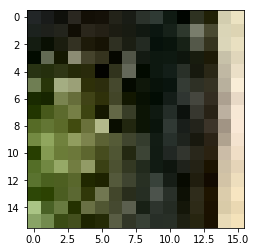

Image belongs:  tractor


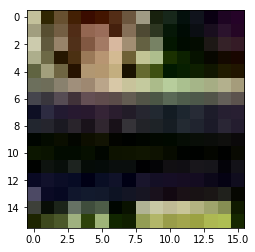

Image belongs:  tractor


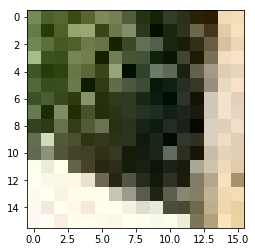

In [44]:
for key, item in categories_patches.items():
    for img in item:
        print("Image belongs: ", key)
        _ = plt.imshow(img)
        plt.show()

In [45]:
# convert patches into 1D arrays and store
X_train_patches = []
X_test_patches = []

for img in X_train_patch:
    for patch in img:
        patch = patch.reshape(-1)
        X_train_patches.append(patch)
        
for img in X_test_patch:
    for patch in img:
        patch = patch.reshape(-1)
        X_test_patches.append(patch)

X_train_patches = np.array(X_train_patches)   
X_test_patches = np.array(X_test_patches)   

In [46]:
# won't need anymore
X_train_patch = None
X_test_patch = None

In [47]:
print("X_train_patches shape: ", X_train_patches.shape)
print("X_test_patches shape: ", X_test_patches.shape)

X_train_patches shape:  (24000, 768)
X_test_patches shape:  (8000, 768)


In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0, max_iter=5000).fit(X_train_patches)

In [49]:
centroids = kmeans.cluster_centers_
kmeans_clusters = kmeans.labels_

In [50]:
print("Shape of the centroids", np.array(centroids).shape)

Shape of the centroids (15, 768)


- Construct the 3-dimensional PCA subspace from the training features

In [51]:
print("Size of the clusters: ", np.array(kmeans_clusters).shape)

Size of the clusters:  (24000,)


In [52]:
# PCA to 3-dim subspace
pca = PCA(n_components=3)
pca_X_train_patches = pca.fit_transform(X_train_patches)

In [53]:
print("X_train_patches dimension after PCA transformation:", pca_X_train_patches.shape)

X_train_patches dimension after PCA transformation: (24000, 3)


In [92]:
# get 6 random clusters
sample_C = 6
cluster_samples = np.random.choice(np.arange(15), size=sample_C, replace=False)

# get the centroids of the sampled clusters
centroid_samples = centroids[cluster_samples]
pca_centroids = pca.transform(centroid_samples)

In [93]:
print(cluster_samples.shape)

(6,)


In [94]:
print("sample 6 centroids: ", np.array(centroid_samples).shape)

sample 6 centroids:  (6, 768)


In [95]:
print("pca sample 6 centroids: ", np.array(pca_centroids).shape)

pca sample 6 centroids:  (6, 3)


In [96]:
# Match colors with the clusters
colors = ["m","b","g","c","r","y"]
colors_dict = dict()

for i in range(len(cluster_samples)):
    colors_dict[cluster_samples[i]] = colors[i]

In [97]:
# get the representation of clusters on the 3D PCA space
sample_clusters_pca = pca_X_train_patches[np.isin(element=kmeans_clusters,test_elements=cluster_samples)]

sample_colors = []
for cluster in kmeans_clusters[np.isin(element=kmeans_clusters, test_elements=cluster_samples)]:
    # get the color info
    sample_colors.append(colors_dict[cluster])

In [98]:
print("Shape of the sample clusters on 3 dim PCA subspace: ", sample_clusters_pca.shape)

Shape of the sample clusters on 3 dim PCA subspace:  (9600, 3)


In [99]:
10841//2

5420

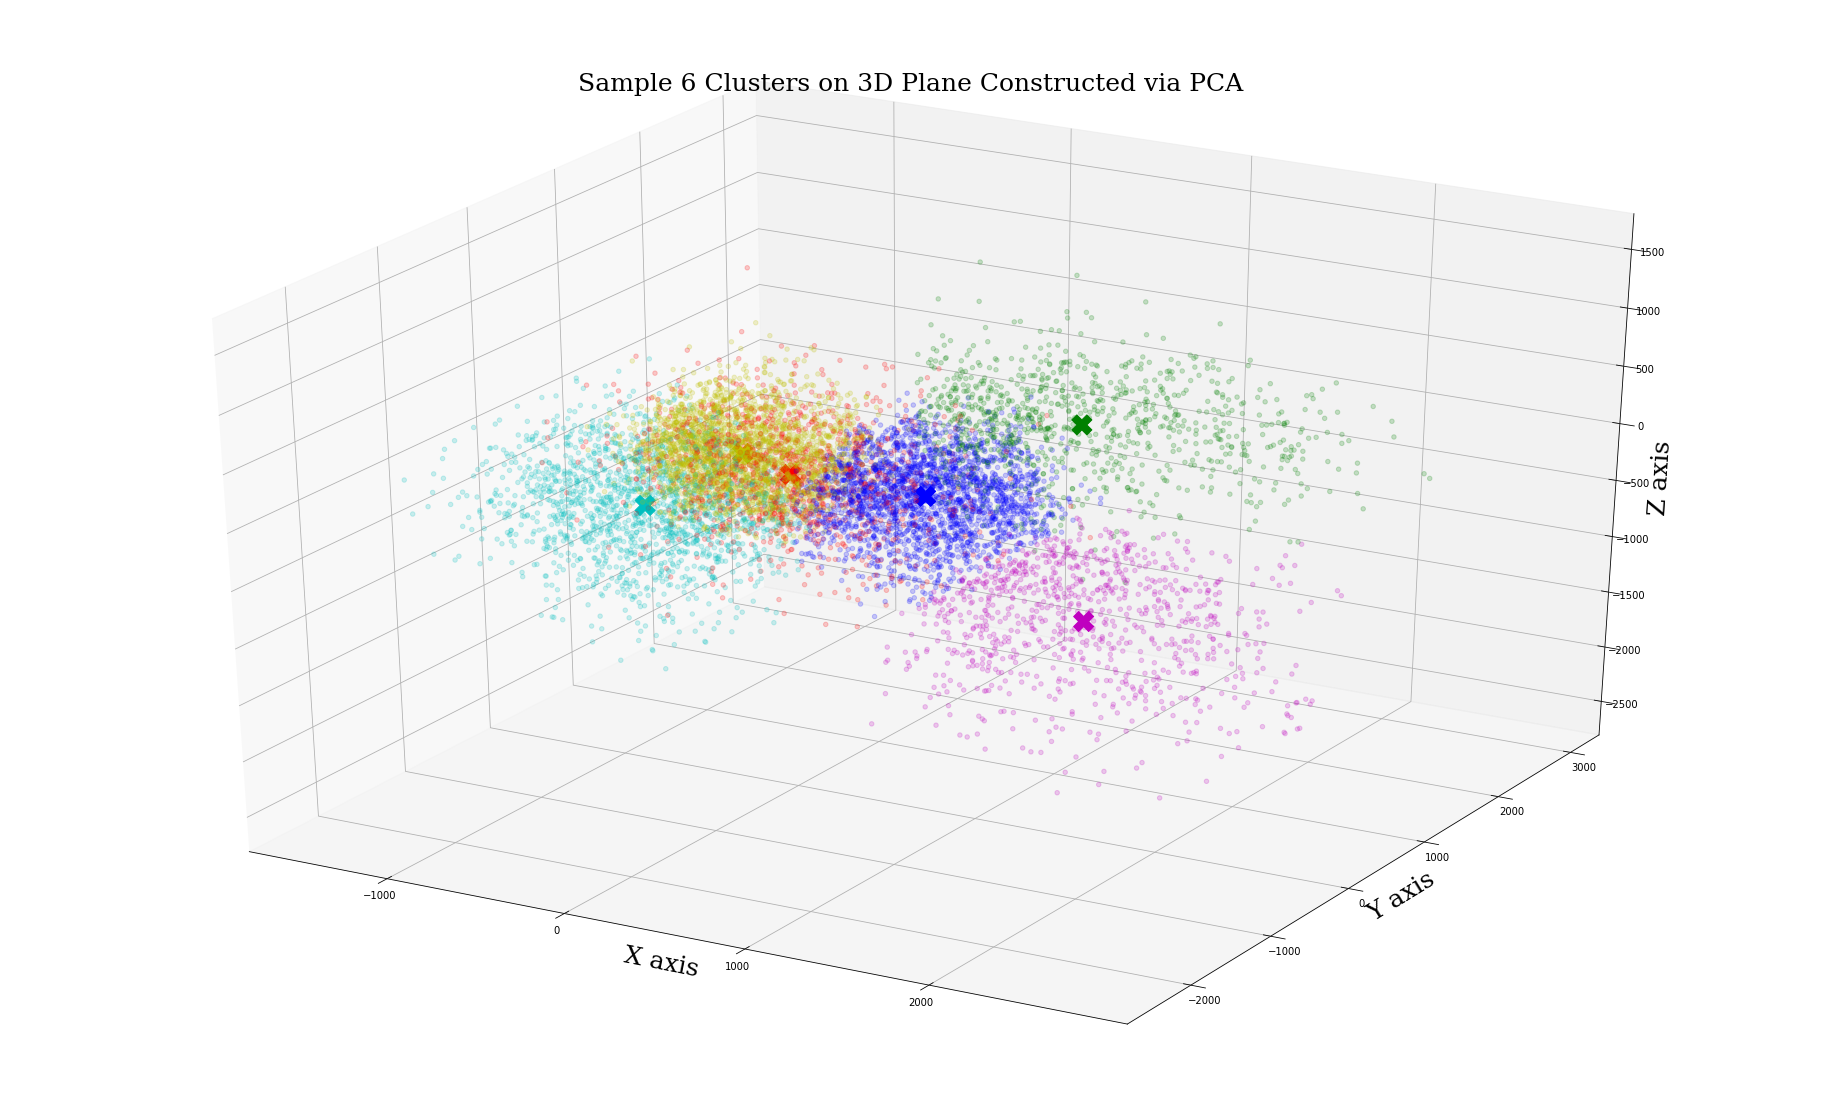

In [100]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }
fig = plt.figure(figsize=(25,15))
ax = Axes3D(fig)
ax.scatter(sample_clusters_pca[:,0], sample_clusters_pca[:,1], sample_clusters_pca[:,2],
           c=sample_colors,alpha=0.2)
ax.scatter(pca_centroids[:,0], pca_centroids[:,1], pca_centroids[:,2],
           s=400, marker = 'X',
           c=colors, alpha=1)
ax.set_title("Sample 6 Clusters on 3D Plane Constructed via PCA", fontdict=font)
ax.set_xlabel('X axis', fontdict=font)
ax.set_ylabel('Y axis', fontdict=font)
ax.set_zlabel('Z axis', fontdict=font)
plt.show()

### Creating Bag of Words for 4 image patches

In [102]:
kmeans_new = KMeans(n_clusters=15, random_state=0, max_iter=5000).fit(X_train)

In [103]:
centroids = kmeans_new.cluster_centers_

In [109]:
X_train.shape

(1500, 12288)

In [133]:
centroids.shape

(15, 12288)

In [136]:
def BOW(sep_descriptors_list, centers, types=None):
  
    def HardSum(dist):
        def where_max(arr):
            return np.where(arr==np.max(arr))[0][0]
        maxidx = np.apply_along_axis(where_max, 1, dist)
        count = np.zeros(centers.shape[0])
        for idx in maxidx:
            count[idx] +=1
        return count/np.sum(count)
    
    def SoftSum(dist):
        dist = np.reciprocal(dist)
        def norm_sum_one(arr):
            return arr/np.sum(arr)
        normalized = np.apply_along_axis(norm_sum_one,1, dist)
        softsum = np.apply_along_axis(np.mean, 0, normalized)
        return softsum#/np.sum(softsum)
    
    def SoftMax(dist):
        dist = np.reciprocal(dist)
        def norm_sum_one(arr):
            return arr/np.sum(arr)
        normalized = np.apply_along_axis(norm_sum_one,1, dist)
        softmax = np.apply_along_axis(max, 0, normalized)
        return softmax

    result = []
    for i in range(len(sep_descriptors_list)):
        # calculate the similarity
        dist = np.dot(centers,sep_descriptors_list[i].T).T
        dist = dist.reshape(1, dist.shape[0])
        if types=="HardSum":
            a = HardSum(dist)
        elif types=="SoftSum":
            a = SoftSum(dist)
        elif types=="SoftMax":
            a = SoftMax(dist)
        else:
            raise NameError('types must be one of the following three: HardSum, SoftSum, SoftMax.')
        result.append(a)
    return np.array(result)

In [137]:
softmax = BOW(X_train, centroids, "SoftMax")

In [138]:
softmax.shape

(1500, 15)

In [148]:
pd.DataFrame(softmax)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.060097,0.073549,0.062002,0.060121,0.035724,0.127247,0.051300,0.052023,0.076019,0.047807,0.063017,0.086893,0.066572,0.052123,0.085506
1,0.059148,0.073743,0.061807,0.060448,0.036128,0.126366,0.052489,0.051979,0.077056,0.048274,0.063392,0.085039,0.066765,0.052923,0.084444
2,0.060150,0.069199,0.051808,0.063557,0.036463,0.117100,0.054817,0.051160,0.088850,0.048324,0.072656,0.085206,0.065077,0.064895,0.070738
3,0.057144,0.072625,0.063534,0.059612,0.034998,0.136568,0.052631,0.047667,0.074735,0.047915,0.055630,0.080730,0.070879,0.048274,0.097056
4,0.064582,0.072359,0.059170,0.060575,0.036452,0.109350,0.049035,0.059285,0.078591,0.047780,0.078285,0.093327,0.060350,0.058640,0.072221
5,0.063129,0.071721,0.056024,0.062244,0.035442,0.123713,0.050879,0.051463,0.080583,0.048698,0.067652,0.090465,0.061669,0.058004,0.078315
6,0.061638,0.073999,0.063327,0.060779,0.036690,0.118654,0.050945,0.054759,0.076532,0.047938,0.065931,0.089601,0.065847,0.053224,0.080135
7,0.060766,0.069999,0.054802,0.063004,0.035700,0.124467,0.052964,0.049903,0.082685,0.048596,0.066134,0.086641,0.065553,0.059356,0.079429
8,0.062585,0.072450,0.062134,0.061043,0.035300,0.128430,0.049506,0.050336,0.074353,0.048489,0.059953,0.089987,0.064908,0.051548,0.088979
9,0.061962,0.071502,0.057882,0.062066,0.036033,0.122727,0.051374,0.051895,0.079723,0.048010,0.065747,0.088865,0.065765,0.056418,0.080030


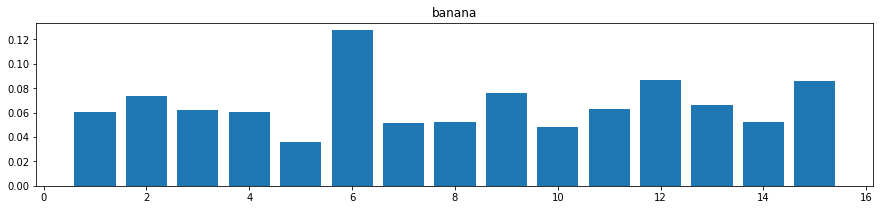

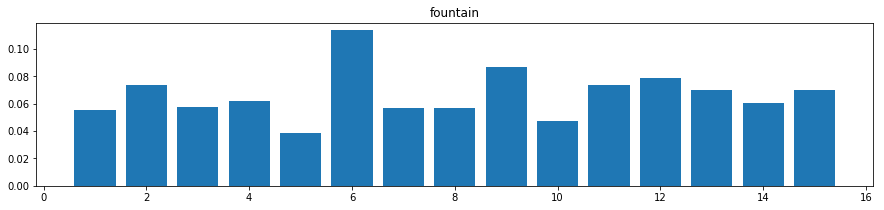

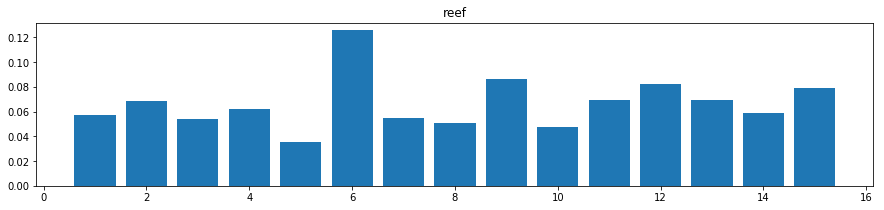

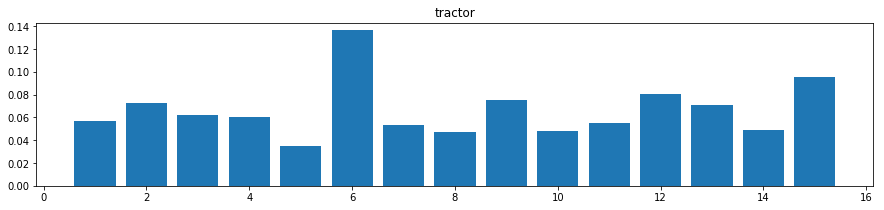

In [147]:
for i in range(0, len(X_train), 375):
    plt.figure(figsize=(15,3))
    plt.subplot(1,1,1)
    plt.title(Y_train[i][:-1])
    plt.bar(np.arange(1, softmax.shape[1]+1), softmax[i] )
    plt.show()

In [140]:
# softmax KNN
knn_softmax = KNeighborsClassifier(n_neighbors=5)
knn_softmax.fit(softmax, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [141]:
X_test.shape

(500, 12288)

In [143]:
test_softmax = BOW(X_test, centroids, "SoftMax")

In [144]:
print("Test-100 accuracy of SoftMax: ", accuracy_score(y_pred=knn_softmax.predict(test_softmax), y_true=Y_test))

Test-100 accuracy of SoftMax:  0.552


### End of the playground

In [30]:
# choose first 3 centroids
cluster_samples_BoW = np.array([0, 1, 2])
centroid_samples_BoW = centroids[cluster_samples_BoW]

In [31]:
print("Shape of the cluster centroid C = 1,2,3: ", centroid_samples_BoW.shape)

Shape of the cluster centroid C = 1,2,3:  (3, 768)


In [32]:
# choose 4 patches from the first image
patch_samples = X_test_patches[0:4]

In [33]:
print("Shape of the patch samples: ", patch_samples.shape)

Shape of the patch samples:  (4, 768)


In [34]:
# Construct the Eucledian distance dataframe
euc_distance = []
for img in patch_samples:
    img_to_cent = []
    for c in centroid_samples_BoW:
        dist = np.linalg.norm(c - img)
        img_to_cent.append(dist)
    euc_distance.append(img_to_cent)

In [35]:
from sklearn.metrics.pairwise import euclidean_distances

euc_distance = euclidean_distances(patch_samples, centroid_samples_BoW)

In [36]:
print(np.array(euc_distance).shape)

(4, 3)


In [37]:
df = pd.DataFrame(euc_distance)
df.index = ["f1", "f2", "f3", "f4"]
df.columns = ['c=1','c=2','c=3']

In [38]:
print("Eucledian Distance of 4 Image Patches to 3 Cluster Centroids")
df

Eucledian Distance of 4 Image Patches to 3 Cluster Centroids


,c=1,c=2,c=3
f1,2761.330024,3116.959730,5071.861263
f2,1918.925232,2125.355331,3449.548980
f3,1443.733268,2460.951225,3416.255956
f4,1537.686054,1642.358772,2737.502382


In [39]:
euc_distance = 1/np.array(euc_distance)

In [40]:
def norm_dist(dist):
        return dist/np.sum(dist)

In [41]:
norm_euc_distance = []
for img_dist in euc_distance:
    img_dist = norm_dist(img_dist)
    norm_euc_distance.append(img_dist)

In [42]:
norm_euc_distance = np.array(norm_euc_distance)

In [43]:
assert norm_euc_distance.shape == (4,3)

In [44]:
df_norm = pd.DataFrame(norm_euc_distance)
df_norm.index = ["f1", "f2", "f3", "f4"]
df_norm.columns = ['c=1','c=2','c=3']

In [45]:
# plot the normalized distance
df_norm

,c=1,c=2,c=3
f1,0.411464,0.364518,0.224018
f2,0.406644,0.367147,0.226209
f3,0.497695,0.291976,0.210329
f4,0.400324,0.374810,0.224866


In [46]:
# take the max value within the each column
bow = np.amax(norm_euc_distance, axis=0)

In [47]:
print("BoW of the given 4 image patches: ", bow)

BoW of the given 4 image patches:  [0.49769481 0.37480986 0.22620892]


### Create Bag of Words for X_train, take C = 15

In [49]:
print(X_train.shape)

(1500, 12288)


In [175]:
def create_BoW(data):
    kmeans = KMeans(n_clusters=15, random_state=0, max_iter=5000).fit(data)
    centroid_samples_BoW  = kmeans.cluster_centers_
    kmeans_clusters = kmeans.labels_
    
    def euc_dist(data, centroid_samples_BoW):
        euc_distance = []
        for img in data:
            img_to_cent = []
            for c in centroid_samples_BoW:
                dist = np.linalg.norm(c - img)
                img_to_cent.append(dist)
            euc_distance.append(img_to_cent)
        return euc_distance
    
    euc_distance = euc_dist(data, centroid_samples_BoW)
    euc_distance = 1/np.array(euc_distance)
    
    norm_euc_distance = []
    for img_dist in euc_distance:
        img_dist = norm_dist(img_dist)
        norm_euc_distance.append(img_dist)
    return np.array(norm_euc_distance)

In [50]:
kmeans = KMeans(n_clusters=15, random_state=0, max_iter=5000).fit(X_train)

In [51]:
centroids = kmeans.cluster_centers_
kmeans_clusters = kmeans.labels_

In [52]:
centroid_samples_BoW = centroids

In [60]:
# Use the whole training set
patch_samples = X_train

In [61]:
# Construct the Eucledian distance dataframe
euc_distance = []
for img in patch_samples:
    img_to_cent = []
    for c in centroid_samples_BoW:
        dist = np.linalg.norm(c - img)
        img_to_cent.append(dist)
    euc_distance.append(img_to_cent)

In [62]:
print(np.array(euc_distance).shape)

(1500, 15)


In [63]:
df = pd.DataFrame(euc_distance)
df.index = ["f" + str(i) for i in range(1, len(X_train)+1)] 
df.columns = ["c=" + str(i) for i in range(1,16)]

In [65]:
# show first 5
df.head()

,c=1,c=2,c=3,c=4,c=5,c=6,c=7,c=8,c=9,c=10,c=11,c=12,c=13,c=14,c=15
f1,10084.123178,8382.582929,9217.455421,7690.284594,11514.317274,10328.011090,7423.932954,9418.437447,8126.918788,8457.693835,9426.211222,9943.424791,7689.417987,9152.104932,9237.122302
f2,7912.303245,5399.109995,6957.106112,5122.027488,11434.658623,7087.898799,5929.561362,7756.131978,5130.631649,7129.929768,7361.056661,6912.200474,4642.827061,7774.203378,6039.903684
f3,11319.233493,8242.940298,7918.976502,9914.550031,15084.375818,8732.220564,10704.683471,11137.183017,10053.625100,11126.512962,11887.684346,9718.544822,8470.435509,13341.516011,7070.095474
f4,11746.792708,12637.535311,12829.569795,10830.849620,7545.054124,16688.747539,10110.196100,8389.332731,12592.283173,9485.707109,9770.836981,13749.359827,12900.013732,8527.691717,15570.496308
f5,12096.436644,8660.965515,10114.271275,9550.164044,16009.567640,7407.779969,9822.453448,12943.817496,8681.866508,11598.142516,12295.387314,10004.388946,7655.848244,12633.697852,7224.894228


In [66]:
# normalize the reciprocal of the distance to obtain BoW
euc_distance = 1/np.array(euc_distance)

In [67]:
norm_euc_distance = []
for img_dist in euc_distance:
    img_dist = norm_dist(img_dist)
    norm_euc_distance.append(img_dist)

In [68]:
norm_euc_distance = np.array(norm_euc_distance)

In [69]:
# check the shape conditions
assert norm_euc_distance.shape == (1500,15)

In [89]:
print("Shape of resulting matrix for obtaining BoW of training images: ", norm_euc_distance.shape)

Shape of resulting matrix for obtaining BoW of training images:  (1500, 15)


In [70]:
df_norm = pd.DataFrame(norm_euc_distance)
df_norm.index = ["f" + str(i) for i in range(1, len(X_train)+1)] 
df_norm.columns = ["c=" + str(i) for i in range(1,16)]

In [71]:
# plot the normalized distance
df_norm.head()

,c=1,c=2,c=3,c=4,c=5,c=6,c=7,c=8,c=9,c=10,c=11,c=12,c=13,c=14,c=15
f1,0.059131,0.071134,0.064691,0.077538,0.051787,0.057735,0.080320,0.063311,0.073372,0.070502,0.063258,0.059968,0.077547,0.065153,0.064553
f2,0.054904,0.080460,0.062442,0.084813,0.037991,0.061289,0.073262,0.056009,0.084671,0.060928,0.059015,0.062847,0.093567,0.055879,0.071924
f3,0.058444,0.080255,0.083538,0.066724,0.043856,0.075758,0.061799,0.059399,0.065801,0.059456,0.055649,0.068070,0.078100,0.049585,0.093568
f4,0.062411,0.058012,0.057144,0.067689,0.097167,0.043929,0.072514,0.087388,0.058220,0.077288,0.075032,0.053321,0.056832,0.085970,0.047084
f5,0.054780,0.076509,0.065516,0.069386,0.041391,0.089453,0.067462,0.051194,0.076325,0.057134,0.053894,0.066235,0.086554,0.052451,0.091717


In [86]:
# show all columns sum up to 1
assert len(np.sum(df_norm, axis = 1).values) == 1500

In [87]:
# take the max value within the each column
bow = np.amax(norm_euc_distance, axis=0)

In [88]:
print("BoW of the given train images: ", bow)

BoW of the given train images:  [0.14627377 0.11239451 0.1766803  0.11214695 0.1626303  0.1488145
 0.13376417 0.11068356 0.10474881 0.13822075 0.11885133 0.12033147
 0.12859744 0.12298137 0.11742468]


In [92]:
print("Shape BoW of the given train images: ", bow.shape)

Shape BoW of the given train images:  (15,)


### Choose 1 image from each Categories Visualize its BoW using Histogram.

In [159]:
# choose 1 image from each class
idx = 0
offset = 375
chosen = []
while idx < len(X_train):
    chosen.append(idx)
    idx += offset

In [160]:
chosen_BoW = norm_euc_distance[chosen]

In [161]:
print(np.max(chosen_BoW))

0.10089452931949505


In [162]:
print(np.min(chosen_BoW))

0.04037319576115817


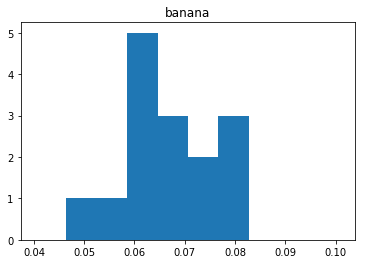

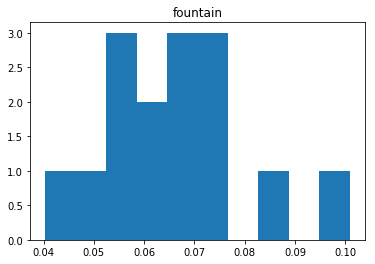

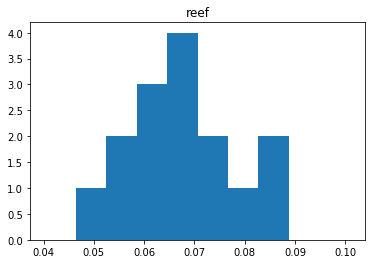

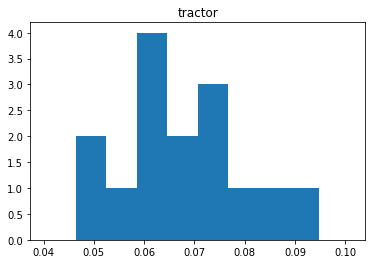

In [165]:
titles = ["banana", "fountain", "reef", "tractor"]
i = 0
for item in chosen_BoW:
    plt.title(titles[i])
    i+= 1
    plt.hist(item, range = (np.min(chosen_BoW), np.max(chosen_BoW)))
    plt.show()

### Apply k-NN to perform classification X test

In [176]:
X_test_bow = create_BoW(X_test)

In [177]:
X_test_bow.shape

(500, 15)

In [178]:
X_train_bow = create_BoW(X_train)

In [179]:
X_train_bow.shape

(1500, 15)

In [180]:
k = 5
kNN = KNeighborsClassifier(n_neighbors = k)
kNN.fit(X_train_bow, Y_train)
pred = kNN.predict(X_test_bow)
print("Accuracy on the test set:", accuracy_score(y_pred = pred, y_true = Y_test))

Accuracy on the test set: 0.21


### Collabrators:

No collabrators other than sci-kit learn documentation. Also I referred to Andrew Ng's Coursera Machine Learning Course.

Internet URL:
- https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
- https://www.youtube.com/watch?v=rng04VJxUt4